<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #191970; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">Makine Öğrenmesiyle Öğrencilerin Yaşam Alışkanlıkları ve Akademik Durumlarına Göre Depresyon Riskinin Tahmini</h1>
</div>

# **1) Proje Tanımı**

        Amaç, öğrencilerin yaşam tarzı alışkanlıkları (uyku, sosyal aktivite, stres, fiziksel aktivite, çalışma saati vb.) ve akademik performans  göstergeleri (CGPA, ders çalışma saatleri, akademik tatmin) kullanılarak depresyon yaşayıp yaşamadıklarını tahmin eden bir makine öğrenmesi modeli geliştirmektir.

# **2) Veri Kaynakları**

## **2.1) Dataset 1** : Daily Lifestyle and Academic Performance

- 2.000 öğrenciden Google Form anketiyle toplanan verileri içerir.

- Ders çalışma süresi, sosyal etkinlikler, uyku, sosyalleşme, fiziksel aktivite, stres düzeyi ve not ortalaması bilgilerini kapsar.

- Veriler, Ağustos 2023 - Mayıs 2024 akademik yılına aittir.

- Katılımcıların çoğu Hindistan’daki öğrencilerden oluşmaktadır.

- **Amaç:** Günlük alışkanlıkların akademik başarı ve öğrenci refahı üzerindeki etkisini incelemek.

## 2.2) Dataset 2 : Student Mental Health

- Öğrencilerin ruh sağlığı ve depresyon riskini etkileyen faktörleri kapsamlı şekilde içerir.

- Demografik bilgiler, akademik ve iş baskıları, yaşam tarzı alışkanlıkları ve ruh sağlığı göstergelerini kapsar.

- **Amaç:** Depresyon eğilimlerini ve risk faktörlerini analiz etmek.

# **3) Yüklemeler ve İlk Kontroller**

### Paketlerin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score, StratifiedKFold, cross_validate,KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
                             classification_report, roc_auc_score, roc_curve, PrecisionRecallDisplay)

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
import joblib

### Veri Yükleme

In [2]:
df1 = pd.read_csv("./datasets/student_lifestyle_dataset.csv")
df2 = pd.read_csv("./datasets/student_depression_dataset.csv")

### Temel Veri Bilgileri

In [3]:
print("\nDataset 1")
print(f"Shape (rows, columns): {df1.shape}")
print("\nFirst 5 rows:")
display(df1.head())

print("\n\n")

print("\nDataset 2")
print(f"Shape (rows, columns): {df2.shape}")
print("\nFirst 5 rows:")
display(df2.head())


Dataset 1
Shape (rows, columns): (2000, 8)

First 5 rows:


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High






Dataset 2
Shape (rows, columns): (27901, 18)

First 5 rows:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


### Genel Bilgi

In [4]:
print("\nDataset 1")
display(df1.info())

print("\n\n")

print("\nDataset 2")
display(df2.info())


Dataset 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


None





Dataset 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  o

None

### İstatiksel Özeti

#### Dataset 1

In [5]:
display(df1.drop(['Student_ID'],axis=1).describe().T)

,count,mean,std,min,25%,50%,75%,max
Study_Hours_Per_Day,2000.0,7.47580,1.423888,5.00,6.3,7.40,8.70,10.0
Extracurricular_Hours_Per_Day,2000.0,1.99010,1.155855,0.00,1.0,2.00,3.00,4.0
Sleep_Hours_Per_Day,2000.0,7.50125,1.460949,5.00,6.2,7.50,8.80,10.0
Social_Hours_Per_Day,2000.0,2.70455,1.688514,0.00,1.2,2.60,4.10,6.0
Physical_Activity_Hours_Per_Day,2000.0,4.32830,2.514110,0.00,2.4,4.10,6.10,13.0
GPA,2000.0,3.11596,0.298674,2.24,2.9,3.11,3.33,4.0


1. **Veri Kümesi Boyutları**:
   - Satir: 2,000
   - Sütun: 8
   - Sütunların hiçbirinde eksik değere rastlanmadı.

2. **Veri Türleri**:
   - Veri kümesi şunları içerir:
     - Sayısal sütunlar: 6 (örneğin, aktivitelere harcanan saatler ve not ortalaması).
     - Kategorik sütun: 1 (Stres Düzeyi).
     - ID Sütunu: 1 (Student_ID).

#### **İlk Gözlemler**
1. **Dengeli Yaşam Tarzı**:
   - Öğrencilerin ders çalışmaya, uykuya ve fiziksel aktiviteye harcadıkları ortalama saatlerin birbirine yakın olması, öğrenciler arasında nispeten dengeli bir yaşam tarzının olduğunu göstermektedir.

2. **GPA ve Yaşam Tarzı Korelasyonu**:
   - Nispeten yüksek ortalama not ortalaması, dengeli yaşam tarzı alışkanlıkları (örneğin yeterli uyku ve çalışma) ile akademik performans arasında olası pozitif bir ilişki olduğunu düşündürmektedir.

3. **Stres Seviyeleri**:
   - Kategorik bir özellik olarak, bunun GPA ve diğer değişkenlerle korelasyonları daha detaylı incelenebilir.

4. **Aykırı Değerler**:
   - Fiziksel aktivite saatleri (maksimum: 13 saat) bazı öğrencilerin olağanüstü derecede aktif olduğunu göstermektedir.
   - Sosyalleşme saatleri de değişkendir ve günlük 6 saate kadar çıkabilir, bu da çeşitli sosyal alışkanlıkların göstergesidir.

#### Dataset 2

In [6]:
display(df2.drop(['id','Depression'],axis=1).describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27901.0,3.141214,1.381465,0.0,2.00,3.00,4.00,5.0
Work Pressure,27901.0,0.000430,0.043992,0.0,0.00,0.00,0.00,5.0
CGPA,27901.0,7.656104,1.470707,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.943837,1.361148,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27901.0,0.000681,0.044394,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27901.0,7.156984,3.707642,0.0,4.00,8.00,10.00,12.0


1. **Veri Kümesi Boyutları**
    - Satır: 27,901
    - Sütun: 18
    - Eksik Değer: Hiçbir sütunda eksik değer bulunmamaktadır.

2. **Veri Türleri**
   - Sayısal sütunlar: 9 (yaş, akademik baskı, iş baskısı, CGPA, çalışma memnuniyeti, iş memnuniyeti, çalışma/öğrenim saatleri vb.)
   - Kategorik sütunlar: 8 (cinsiyet,şehir,beslenme alışkanlıkları, family history vb.)
   - ID Sütunu: 1 (ID)

#### **İlk Gözlemler**

1. **Demografik Dağılım (Age)**
   - Ortalama yaş 25.82, minimum 18, maksimum 59 olarak gözlenmiştir.
   - Bu, veri kümesinde hem üniversite öğrencilerini hem de mezun/çalışan bireyleri içeren geniş bir yaş aralığına işaret etmektedir.

2. **Akademik Baskı ve CGPA**
   - Akademik Baskı (mean = 3.14) orta seviyededir.
   - CGPA ortalaması 7.65 olup, bu değer oldukça iyi bir akademik performansa işaret eder.
   - Bu iki değişkenin birlikte incelenmesi, akademik baskının başarı üzerindeki etkisini anlamada kritik olacaktır.

3. **Çalışma Memnuniyeti (Study Satisfaction)**
   - Ortalama 2.94, medyan 3.0, bu da memnuniyetin orta düzeyde olduğunu gösterir.
   - Akademik baskı ve çalışma memnuniyeti birlikte analiz edildiğinde, baskı arttıkça memnuniyetin azalıp azalmadığı değerlendirilebilir.

4. **Aykırı Değerler**
   - Work Pressure ve Job Satisfaction değişkenlerinde 5 ve 4 değerlerine kadar çıkan seyrek yüksek değerler, aykırı gözlemler olabilir.
   - Age değişkeninde 59 yaşa kadar çıkılması da, bazı katılımcıların öğrenci dışı profilde olabileceğini düşündürmektedir. 

#  **4) Birleştirme Stratejisi**

**Amaç:** Birleştirme sonucunda, öğrencilerin günlük yaşam alışkanlıklarının (uyku, çalışma süresi, sosyal aktivite vb.) depresyon riski üzerindeki etkisini analiz etmek.

## 4.1. Ortak Not Ortalaması, Uyku saati ve Çalışma saati Anahtarlar Üzerinden birleştirme


Veri kümeleri arası birleştirme için üç ortak anahtar (ders çalışma saati, uyku süresi, GPA) oluşturuldu. Bu anahtarlar, sayısal uyumluluk sağlamak amacıyla yuvarlama ve kategoriden sayıya dönüşüm işlemlerinden geçirildi. Ardından inner join ile yalnızca üç anahtarın tamamında birebir eşleşen örnekler seçilerek nihai birleşik veri kümesi elde edildi.

   - ### Sütun İsimlerini Kontrol Etme

In [7]:
print("Dataset 1: ",df1.columns)

print("\n")

print("Dataset 2: ",df2.columns)

Dataset 1:  Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')


Dataset 2:  Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


- ### Önemli sütunlarının seçimi

In [8]:

df1_sub = df1[["Sleep_Hours_Per_Day","Extracurricular_Hours_Per_Day","Social_Hours_Per_Day","Study_Hours_Per_Day","Physical_Activity_Hours_Per_Day","GPA","Stress_Level"]].copy()
df2_sub = df2[["Work/Study Hours","Sleep Duration","Academic Pressure", "Financial Stress","CGPA", "Depression"]].copy()


- ### Dataset 2'de CGPA, 4.0 ölçeğine çevirme

In [9]:
df2_sub["GPA"] = ((df2_sub["CGPA"] * 4) / 10).round(2)

* ### Dataset 1'de çalışma saatinin yuvalarması

In [10]:
df1_sub["study_hours"] = df1_sub["Study_Hours_Per_Day"].round(0).astype(int)  # ör. 6.9 -> 7

- ### Dataset 2 zaten tam sayı olduğu için direkt kullanacağız, ama isimlendirelim

In [11]:
df2_sub["study_hours"] = df2_sub["Work/Study Hours"].astype(pd.Int64Dtype())

- ### Dataset1 sleep hours: ondalığı en yakın tam sayıya yuvarla
- ### Dataset2 Sleep hours: kategorik değerlerin mapping kullanarak tam sayıyı dönüştürmek

In [12]:
df1_sub["sleep_hours"] = df1_sub["Sleep_Hours_Per_Day"].round(0).astype(int)

sleep_map = {
    "'Less than 5 hours'": 4,
    "'5-6 hours'": 6,
    "'7-8 hours'": 8,
    "'More than 8 hours'": 9,
    "Others": np.nan
}
df2_sub["sleep_hours"] = df2_sub["Sleep Duration"].map(sleep_map).astype(pd.Int64Dtype())

- ### Dataset 1 ve Dataset 2 satır sayısı

In [13]:
print("DF1 hazır satır sayısı:", len(df1_sub))
print("DF2 hazır satır sayısı:", len(df2_sub))

DF1 hazır satır sayısı: 2000
DF2 hazır satır sayısı: 27901


- ### study hours - sleep hours - GPA üzerinde birleştirme

In [14]:
merged_df = pd.merge(
    df1_sub,
    df2_sub,
    on=["study_hours", "sleep_hours", "GPA"],
    how="inner"
)

print("Basit merge sonrası satır sayısı:", merged_df.shape)
merged_df.head()

Basit merge sonrası satır sayısı: (3443, 15)


,Sleep_Hours_Per_Day,Extracurricular_Hours_Per_Day,Social_Hours_Per_Day,Study_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,study_hours,sleep_hours,Work/Study Hours,Sleep Duration,Academic Pressure,Financial Stress,CGPA,Depression
0,8.7,3.8,2.8,6.9,1.8,2.99,Moderate,7,9,7.0,'More than 8 hours',3.0,1.0,7.48,1
1,8.7,3.8,2.8,6.9,1.8,2.99,Moderate,7,9,7.0,'More than 8 hours',1.0,4.0,7.48,0
2,8.7,3.8,2.8,6.9,1.8,2.99,Moderate,7,9,7.0,'More than 8 hours',1.0,2.0,7.47,0
3,6.5,0.6,2.2,8.1,6.6,3.51,High,8,6,8.0,'5-6 hours',3.0,4.0,8.78,1
4,8.0,2.1,0.3,6.0,7.6,2.85,Moderate,6,8,6.0,'7-8 hours',1.0,3.0,7.13,1


- ### Birleştiren veriden tekrar eden özelliklerin kaldırılması

In [15]:
merged_df.drop(['Sleep_Hours_Per_Day', 'Study_Hours_Per_Day', 'Work/Study Hours', 'CGPA','Sleep Duration'], axis=1, inplace=True) 

- ### Birleştirmiş veri setinin boyutu

In [16]:
print("\nBirleştirilmiş veri seti boyutu:", merged_df.shape)


Birleştirilmiş veri seti boyutu: (3443, 10)


- ### Nihai veri seti kaydetme

In [17]:
merged_df.to_csv("./datasets/Merged_Student_Lifestyle_MentalHealth.csv", index=False)

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #90e0ef; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #38040e; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">Keşifsel Veri Analizi (EDA)</h1>
</div>

- ## **Amaç:** Verinin yapısını anlamak, türleri, eksik değerleri, çift kayıtları görmek vb.

### 1. İlk 5 satır

In [18]:
merged_df.head()

,Extracurricular_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,study_hours,sleep_hours,Academic Pressure,Financial Stress,Depression
0,3.8,2.8,1.8,2.99,Moderate,7,9,3.0,1.0,1
1,3.8,2.8,1.8,2.99,Moderate,7,9,1.0,4.0,0
2,3.8,2.8,1.8,2.99,Moderate,7,9,1.0,2.0,0
3,0.6,2.2,6.6,3.51,High,8,6,3.0,4.0,1
4,2.1,0.3,7.6,2.85,Moderate,6,8,1.0,3.0,1


### 1.2 Boyut ve sütun tipleri

In [19]:
print("Shape:", merged_df.shape)
print("\n",merged_df.dtypes)

Shape: (3443, 10)

 Extracurricular_Hours_Per_Day      float64
Social_Hours_Per_Day               float64
Physical_Activity_Hours_Per_Day    float64
GPA                                float64
Stress_Level                        object
study_hours                          int64
sleep_hours                          int64
Academic Pressure                  float64
Financial Stress                    object
Depression                           int64
dtype: object


### 1.3 Özet istatistik (sayısal)


In [20]:
merged_df.drop(['Depression'],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Extracurricular_Hours_Per_Day,3443.0,1.968603,1.172825,0.00,1.00,1.90,3.00,4.0
Social_Hours_Per_Day,3443.0,2.733488,1.668889,0.00,1.30,2.60,4.10,6.0
Physical_Activity_Hours_Per_Day,3443.0,3.835957,2.347281,0.00,1.90,3.70,5.50,12.4
GPA,3443.0,3.183082,0.294389,2.28,2.95,3.18,3.42,4.0
study_hours,3443.0,7.895730,1.545510,5.00,6.00,8.00,9.00,10.0
sleep_hours,3443.0,7.622713,1.183720,6.00,6.00,8.00,9.00,9.0
Academic Pressure,3443.0,3.106303,1.375587,0.00,2.00,3.00,4.00,5.0


- **Ders dışı aktiviteler:** Ortalama 2 saat civarında.

- **Sosyal aktiviteler:** Ortalama 2.7 saat, minimum 0 maksimum 6 saat.

- **Fiziksel aktivite:** Ortalama 3.8 saat, öğrenciler arasında farklar var.

- **GPA:** Ortalama 3.18,akademik başarı düzeyini gösteriyor.

- **Çalışma saati:** Ortalama 7.9 saat.

- **Uyku süresi:** Ortalama 7.6 saat.

- **Akademik baskı:** 5 üzerinden ortalama 3,yani çoğu öğrenci orta düzey stres hissediyor.

Tabloya baktığımızda, öğrencilerin genel olarak dengeli bir yaşam tarzına sahip olduklarını, ancak bazı öğrencilerde aşırı çalışma, düşük sosyal aktivite veya yüksek akademik baskı gibi dengesizliklerin görüldüğünü söyleyebiliriz.
Bu farklılıklar, depresyon riskini etkileyebilecek önemli göstergeler olabilir.

### 1.5 Kategorik değişkenlerin frekansları

In [21]:
for col in merged_df.select_dtypes(include='object').columns:
    print(f"\n--- {col} ---")
    print(merged_df[col].value_counts(dropna=False).head(20))


--- Stress_Level ---
Stress_Level
High        1982
Moderate    1054
Low          407
Name: count, dtype: int64

--- Financial Stress ---
Financial Stress
5.0    853
4.0    776
3.0    648
2.0    621
1.0    545
Name: count, dtype: int64


- ## Eksik veriler (Missing values)

### **Amaç:** Hangi sütunlarda kaç tane eksik var, eksiklerin yapısına göre strateji seçecektir.

### 2.1 Eksik değer sayısı ve oranı

In [22]:
miss = merged_df.isnull().sum().sort_values(ascending=False)
miss_percent = (miss / len(merged_df) * 100).round(2)
pd.concat([miss, miss_percent], axis=1, keys=['count', 'percent']).head(30)

,count,percent
Extracurricular_Hours_Per_Day,0,0.0
Social_Hours_Per_Day,0,0.0
Physical_Activity_Hours_Per_Day,0,0.0
GPA,0,0.0
Stress_Level,0,0.0
study_hours,0,0.0
sleep_hours,0,0.0
Academic Pressure,0,0.0
Financial Stress,0,0.0
Depression,0,0.0


In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3443 entries, 0 to 3442
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Extracurricular_Hours_Per_Day    3443 non-null   float64
 1   Social_Hours_Per_Day             3443 non-null   float64
 2   Physical_Activity_Hours_Per_Day  3443 non-null   float64
 3   GPA                              3443 non-null   float64
 4   Stress_Level                     3443 non-null   object 
 5   study_hours                      3443 non-null   int64  
 6   sleep_hours                      3443 non-null   int64  
 7   Academic Pressure                3443 non-null   float64
 8   Financial Stress                 3443 non-null   object 
 9   Depression                       3443 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 269.1+ KB


# Stres Düzeyi için Etiket Kodlaması (Label Encoding)

In [24]:
merged_df['Stress_Level'] = merged_df['Stress_Level'].map({
    'Low': 0,
    'Moderate': 1,
    'High': 2
})

In [25]:
merged_df.sample(6)

,Extracurricular_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,study_hours,sleep_hours,Academic Pressure,Financial Stress,Depression
1697,0.0,4.4,2.2,3.38,2,10,8,5.0,4.0,1
1623,0.8,5.6,3.8,3.45,2,8,6,3.0,2.0,0
3295,4.0,3.2,0.4,2.95,1,7,9,3.0,4.0,0
1646,0.6,3.6,3.4,3.26,1,8,9,2.0,5.0,0
1021,2.6,2.1,1.2,3.38,2,10,8,2.0,4.0,1
2012,2.7,2.9,2.1,3.49,2,10,6,1.0,4.0,0


- ### Histogramlar / yoğunluk

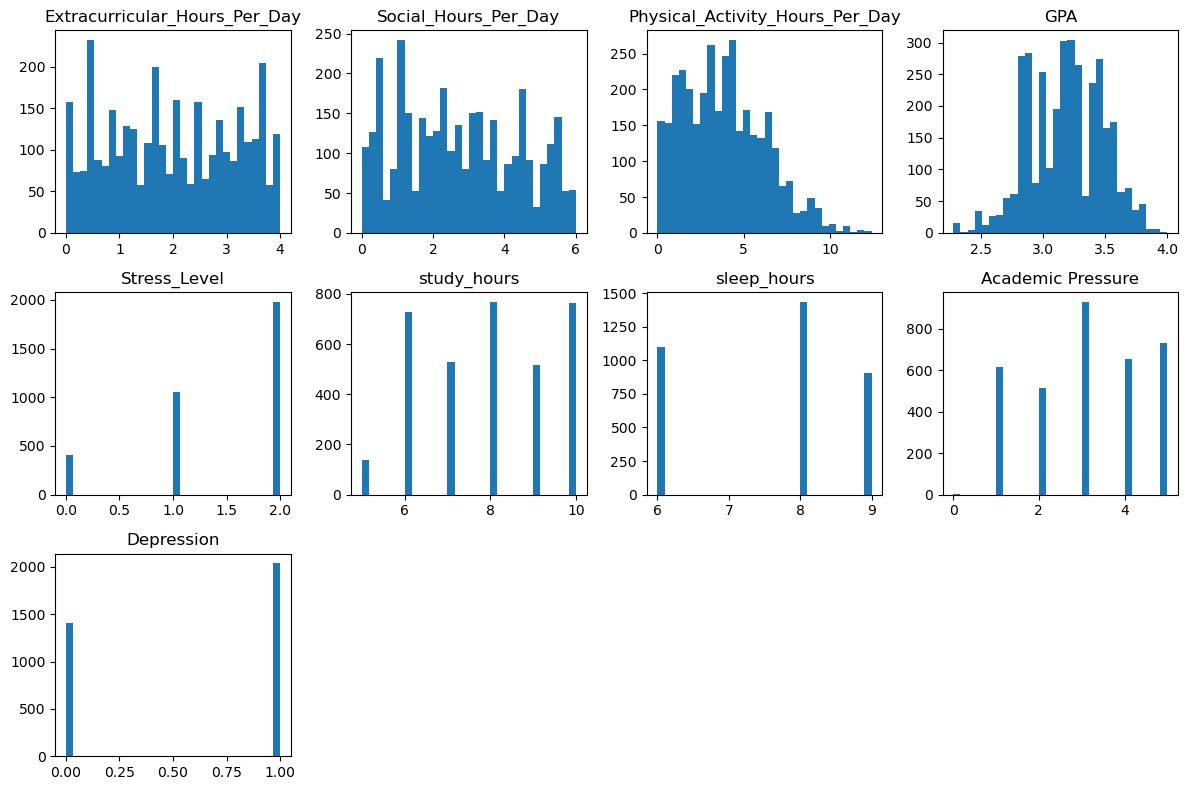

In [26]:
num_cols = merged_df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i+1)
    plt.hist(merged_df[col].dropna(), bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

- ### Aykırı görselleştirme

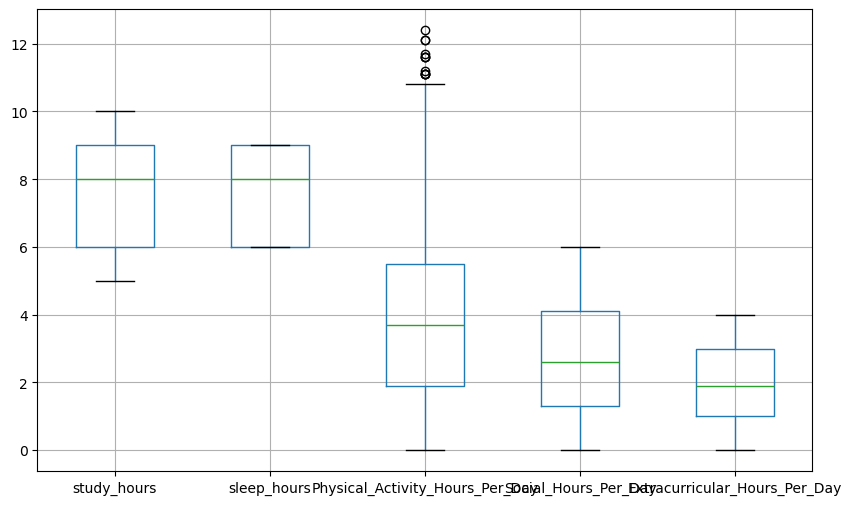

In [27]:
plt.figure(figsize=(10, 6))
merged_df.boxplot(column=['study_hours','sleep_hours','Physical_Activity_Hours_Per_Day','Social_Hours_Per_Day','Extracurricular_Hours_Per_Day'])
plt.show()

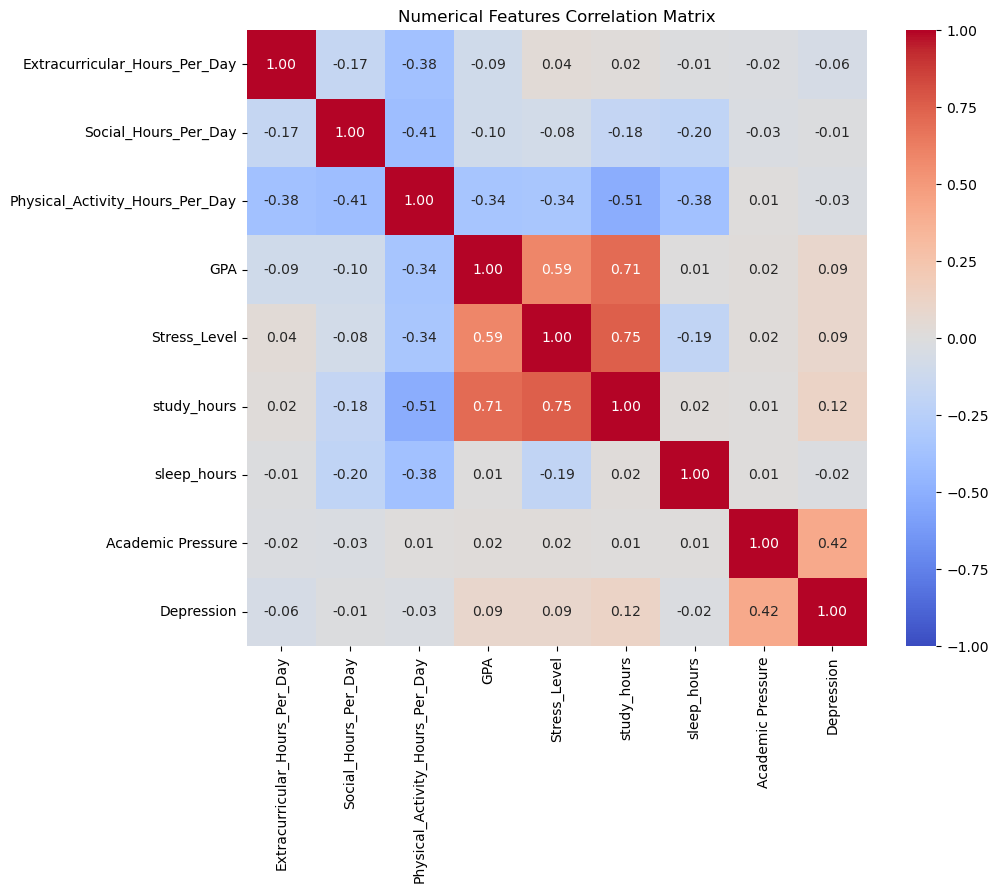

In [28]:
corr = merged_df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr, 
    annot=True,        
    fmt=".2f",         
    cmap='coolwarm',  
    vmin=-1, vmax=1    
)
plt.title("Numerical Features Correlation Matrix")
plt.show()

- Yapılan korelasyon analizi sonucunda, depresyon değişkeniyle en yüksek pozitif ilişkiye sahip değişkenin **Academic Pressure** olduğu görülmüştür **(r ≈ 0.42)**.
Bu, öğrencilerin akademik baskı düzeyi arttıkça depresyon olasılığının da belirgin şekilde yükseldiğini göstermektedir.

- **Study Hours** değişkeni düşük düzeyde pozitif bir ilişki **(r ≈ 0.12)** göstermiştir. Bu durum, aşırı ders çalışma süresinin depresyon riskini hafifçe artırabileceğini düşündürmektedir.

- Buna karşılık, **Physical Activity Hours Per Day** ve **Extracurricular Hours Per Day** değişkenleri depresyonla zayıf negatif ilişki göstermektedir. Yani öğrenciler daha fazla fiziksel aktivite veya sosyal etkinliklere katıldıkça depresyon riskinin az da olsa düştüğü söylenebilir.

Genel olarak, akademik baskı depresyonu artıran en önemli faktör,
fiziksel ve sosyal aktiviteler ise koruyucu faktörler olarak öne çıkmaktadır.

- ## Sayısal Verilerin Ölçeklendirilmesi

#### Veri setinde yer alan sayısal değişkenler farklı ölçeklerde olduğundan, modelin ağırlık öğrenmesini zorlaştırabilir. Bu nedenle tüm sayısal değerler benzer aralıklara dönüştürülür.

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #90e0ef; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #38040e; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">Modelleme</h1>
</div>

## 1) Veri/Hedef Hazırlığı

**Amaç:** Modeli eğitmek için X (özellikler) ve y (target=Depression) hazırlama

In [29]:
y = merged_df['Depression']
X = merged_df.drop(columns=['Depression'])

## 2) Train/Test Veri Ayırma

**Amaç:** Veri setini eğitim ve test olarak ayırılmaktadır. stratify=y sınıf dağılımını korumaktadır.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 3) Ölçeklendirme (Model Bazlı)

**Amaç:** SVM ve KNN için MinMaxScaler uygulayacağız; RandomForest ölçeklendirme gerektirmez.

- #### SVM/KNN için scale

In [31]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4) Modellerin tanımlanması ve temel eğitim

**Amaç:** Her model için basit parametrelerle baseline sonuçlarını almak.

In [32]:
# 1) Random Forest (no scaling, kullan X_train_sm)
rf = RandomForestClassifier(    n_estimators=300,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 2) SVM (RBF) (scaler kullanılmış X_train_scaled)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)  # dikkat: X_train_scaled ile train resample edilmiş hali kullanıldıysa aynı index ve shape olmalı

# Eğer X_train_sm kullanıldıysa, scale on it:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred_svm = svm.predict(X_test_scaled)

# 3) KNN (k=5 baseline)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

## 5) Değerlendirme metrikleri fonksiyonu

**Amaç:** Tek kod bloğuyla tüm metrikleri hesaplayıp raporlayalım.

In [33]:
def evaluate_model(name, y_true, y_pred, y_proba=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"--- {name} ---")
    print("Accuracy:", round(acc, 4))
    print("Precision:", round(prec, 4))
    print("Recall:", round(rec, 4))
    print("F1-score:", round(f1, 4))

    if y_proba is not None:
        roc = roc_auc_score(y_true, y_proba)
        print("ROC AUC:", round(roc, 4))

    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print('confusion matrix',cm)

    # Görsel olarak göster
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

--- Random Forest ---
Accuracy: 0.7605
Precision: 0.798
Recall: 0.7961
F1-score: 0.797
ROC AUC: 0.8175

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71       282
           1       0.80      0.80      0.80       407

    accuracy                           0.76       689
   macro avg       0.75      0.75      0.75       689
weighted avg       0.76      0.76      0.76       689

confusion matrix [[200  82]
 [ 83 324]]


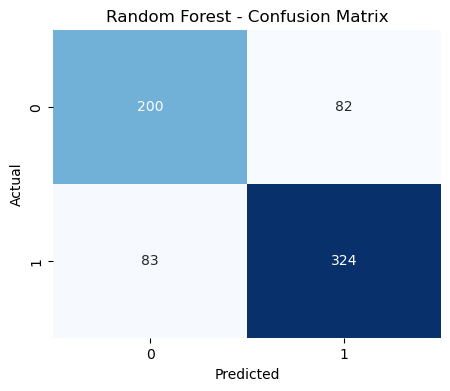

--- SVM (RBF) ---
Accuracy: 0.7562
Precision: 0.7559
Recall: 0.8673
F1-score: 0.8078
ROC AUC: 0.808

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.60      0.67       282
           1       0.76      0.87      0.81       407

    accuracy                           0.76       689
   macro avg       0.76      0.73      0.74       689
weighted avg       0.76      0.76      0.75       689

confusion matrix [[168 114]
 [ 54 353]]


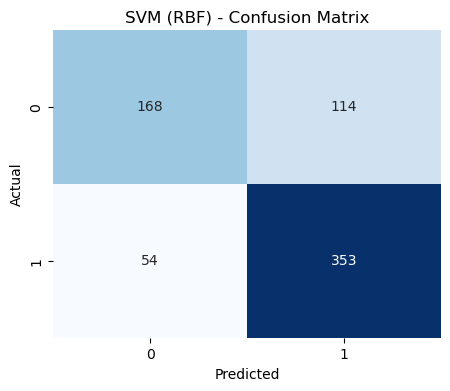

--- KNN ---
Accuracy: 0.7141
Precision: 0.7408
Recall: 0.7936
F1-score: 0.7663
ROC AUC: 0.7625

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.60      0.63       282
           1       0.74      0.79      0.77       407

    accuracy                           0.71       689
   macro avg       0.70      0.70      0.70       689
weighted avg       0.71      0.71      0.71       689

confusion matrix [[169 113]
 [ 84 323]]


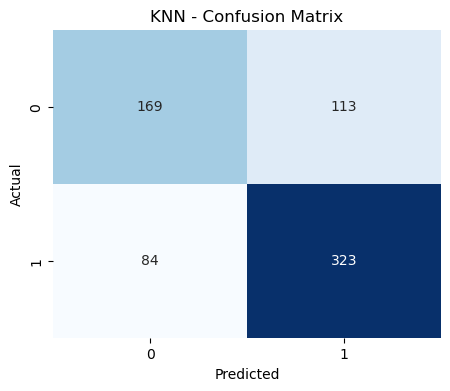

In [34]:
# RF
evaluate_model("Random Forest", y_test, y_pred_rf, y_proba=rf.predict_proba(X_test)[:,1])

# SVM
evaluate_model("SVM (RBF)", y_test, y_pred_svm, y_proba=svm.predict_proba(X_test_scaled)[:,1])

# KNN
evaluate_model("KNN", y_test, y_pred_knn, y_proba=knn.predict_proba(X_test_scaled)[:,1])


- ### Model Karşılaştırması ve Sonuç Analizi

Bu çalışmada üç farklı non-lineer makine öğrenmesi algoritması (Random Forest, SVM (RBF), KNN) uygulanmıştır.
Amaç, öğrencilerin depresyon durumunu tahmin etmek ve hangi modelin bu görevi daha başarılı şekilde gerçekleştirdiğini analiz etmektir.

| Model             |  Accuracy  |  Precision |   Recall   |  F1-Score  |   ROC AUC  |
| :---------------- | :--------: | :--------: | :--------: | :--------: | :--------: |
| **Random Forest** | **0.7605** | **0.7980** |   0.7961   | **0.7970** | **0.8175** |
| **SVM (RBF)**     |   0.7562   |   0.7559   | **0.8673** | **0.8078** |   0.8080   |
| **KNN**           |   0.7100   |   0.7408   |   0.7936   |   0.7663   |   0.7625   |


## **Yorumlar:**

- Random Forest modeli, genel olarak en yüksek accuracy (0.76) ve ROC AUC (0.82) değerlerine ulaşmıştır.
Bu sonuç, modelin hem doğru sınıflandırma oranının hem de sınıflar arasındaki ayrım gücünün oldukça iyi olduğunu göstermektedir.
Ayrıca precision ve recall değerlerinin dengeli olması, modelin kararlı bir performans sergilediğini gösterir.

- SVM (RBF) modeli, en yüksek recall (0.87) değerine sahiptir.
Bu, depresyon yaşayan öğrencileri daha iyi tespit ettiğini, yani pozitif sınıfı yakalama konusunda daha başarılı olduğunu gösterir.
Ancak precision değerinin biraz daha düşük olması, bazı yanlış pozitif tahminlerin bulunduğunu göstermektedir.

- KNN modeli ise diğer iki modele kıyasla daha düşük performans göstermiştir.
Bu durum, veri setindeki karmaşık ilişkilerin KNN algoritması tarafından yeterince öğrenilememesiyle açıklanabilir.
Yine de KNN modeli makul düzeyde bir doğruluk sağlamaktadır.

# 6) İyileştirmeler

Aşağıdaki iyileştirme adımlarını sırayla uygulayıp tekrar değerlendirecktir

- ### 6.1 GridSearchCV / RandomizedSearchCV (Hyperparameter tuning)

## Random Forest

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': True}
Best F1 Score: 0.7957942305466847
--- Random Forest (tuned) ---
Accuracy: 0.7591
Precision: 0.7537
Recall: 0.8796
F1-score: 0.8118
ROC AUC: 0.8188

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.59      0.67       282
           1       0.75      0.88      0.81       407

    accuracy                           0.76       689
   macro avg       0.76      0.73      0.74       689
weighted avg       0.76      0.76      0.75       689

confusion matrix [[165 117]
 [ 49 358]]


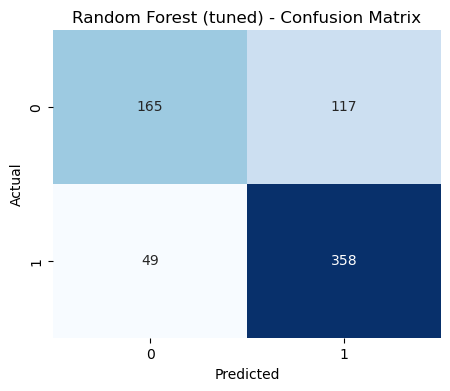

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(
    rf, param_grid, n_iter=20, scoring='f1', cv=5, n_jobs=-1, random_state=42
)
rf_search.fit(X_train, y_train)

print("Best Parameters:", rf_search.best_params_)
print("Best F1 Score:", rf_search.best_score_)

best_rf = rf_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
evaluate_model("Random Forest (tuned)", y_test, y_pred_best_rf, y_proba=best_rf.predict_proba(X_test)[:,1])

## SVM

--- SVM (tuned) ---
Accuracy: 0.7518
Precision: 0.7489
Recall: 0.8722
F1-score: 0.8059
ROC AUC: 0.8134

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.58      0.66       282
           1       0.75      0.87      0.81       407

    accuracy                           0.75       689
   macro avg       0.75      0.73      0.73       689
weighted avg       0.75      0.75      0.74       689

confusion matrix [[163 119]
 [ 52 355]]


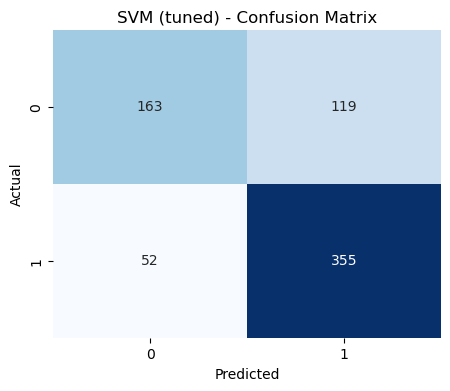

In [36]:
param_grid_svm = {'C':[0.1,1,10], 'gamma':[1,0.1,0.01], 'kernel':['rbf']}
gs_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=cv, scoring='f1', n_jobs=-1)
gs_svm.fit(X_train_scaled, y_train)
best_svm = gs_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test_scaled)
evaluate_model("SVM (tuned)", y_test, y_pred_best_svm, y_proba=best_svm.predict_proba(X_test_scaled)[:,1])

## KNN

--- KNN (tuned) ---
Accuracy: 0.7489
Precision: 0.7623
Recall: 0.8354
F1-score: 0.7972
ROC AUC: 0.778

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.62      0.67       282
           1       0.76      0.84      0.80       407

    accuracy                           0.75       689
   macro avg       0.74      0.73      0.73       689
weighted avg       0.75      0.75      0.75       689

confusion matrix [[176 106]
 [ 67 340]]


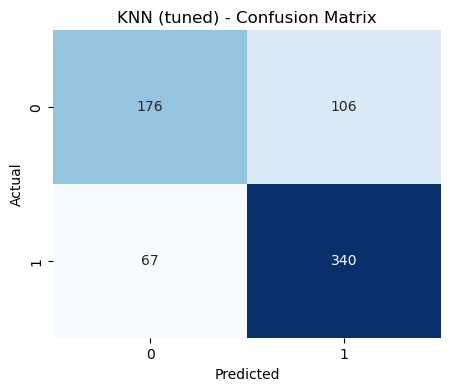

In [37]:
param_grid_knn = {'n_neighbors':[3,5,7,9], 'weights':['uniform','distance']}
gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=cv, scoring='f1', n_jobs=-1)
gs_knn.fit(X_train_scaled, y_train)
best_knn = gs_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test_scaled)
evaluate_model("KNN (tuned)", y_test, y_pred_best_knn, y_proba=best_knn.predict_proba(X_test_scaled)[:,1])


#### Bu aşamada her model için uygun hiperparametre kombinasyonları GridSearchCV yöntemi ile aranmıştır. Amaç, modellerin performansını artırmak ve aşırı/eksik öğrenme riskini azaltmaktır.

| Model                     |  Accuracy  |  Precision |   Recall   |  F1-Score  |   ROC AUC  |
| :------------------------ | :--------: | :--------: | :--------: | :--------: | :--------: |
| **Random Forest (Tuned)** | **0.7591** |   0.7537   | **0.8796** | **0.8118** | **0.8188** |
| **SVM (Tuned)**           |   0.7518   |   0.7489   |   0.8722   |   0.8059   |   0.8134   |
| **KNN (Tuned)**           |   0.7489   | **0.7623** |   0.8354   |   0.7972   |   0.7780   |


# **Yorumlar:**

  - **Random Forest (Tuned)** modeli, genel olarak en yüksek **F1-score (0.81)** ve **ROC AUC (0.82)** değerlerine ulaşmıştır. Bu, modelin hem sınıflar arası ayırma gücünün hem de genel denge performansının en iyi seviyede olduğunu göstermektedir. Ayrıca recall değerinin yüksek çıkması **(0.88)**, modelin depresyon yaşayan öğrencileri yakalama konusunda oldukça başarılı olduğunu ortaya koymaktadır.

  - **SVM (Tuned)** modeli, yüksek **recall (0.87)** değeriyle depresyon yaşayan öğrencileri tespit etmede güçlü bir performans sergilemiştir. Ancak precision değerinin biraz daha düşük olması, bazı öğrencilerin yanlış şekilde depresyonlu olarak sınıflandırıldığını göstermektedir. Bu nedenle, pozitif sınıfı kaçırmamak için uygun, fakat yanlış pozitifleri azaltmak için dikkatli ayarlama gerektiren bir modeldir.

  - **KNN (Tuned)** modeli, hiperparametre optimizasyonu sonrasında belirgin bir gelişme göstermiştir. **F1-score** değeri **0.79**’a ulaşmış ve recall değeri 0.83 olmuştur. Ancak diğer iki modele kıyasla **ROC AUC** değeri biraz daha düşük **(0.78)** kaldığı için, verideki karmaşık ilişkileri tam olarak yakalayamamaktadır.

# **Genel Değerlendirme:**

  - Tüm modellerde hiperparametre optimizasyonu sonrasında özellikle recall değerlerinde artış gözlemlenmiştir. Bu durum, sistemin depresyon riski taşıyan öğrencileri kaçırmama konusunda daha duyarlı hale geldiğini göstermektedir.

  - **Random Forest (Tuned)** modeli genel denge açısından en başarılı sonuçları vermiştir.

  - **SVM (Tuned)** modeli depresyon tespitinde hassas, ancak yanlış pozitif oranı biraz daha yüksektir.

  - **KNN (Tuned)** modeli anlamlı bir gelişim göstermiş olsa da, karmaşık veri yapılarında sınırlı kalmıştır.

# **Sonuç:**

Hiperparametre optimizasyonu sonrasında, **Random Forest (Tuned)** modeli bu problem için **en dengeli, güvenilir ve tutarlı model** olarak öne çıkmaktadır. Özellikle ROC AUC ve F1 değerlerinin yüksek olması, modelin hem doğruluk hem de genel sınıflandırma başarısı açısından **en uygun tercih** olduğunu göstermektedir. Bu sonuçlar, makine öğrenmesiyle öğrencilerin yaşam alışkanlıkları ve akademik durumlarına göre depresyon riskinin tahmininde **Random Forest algoritmasının güçlü bir performans sunduğunu** doğrulamaktadır.

- #### Eğitim ve Test Performansı

In [38]:
# Training performance
y_train_pred = best_rf.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Training F1: {train_f1:.4f}")

# Test performance
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred_rf):.4f}")


Training Accuracy: 0.7760
Training F1: 0.8236
Test Accuracy: 0.7605
Test F1: 0.7970


- ### Öğrenme Eğrisi (Random Forest)

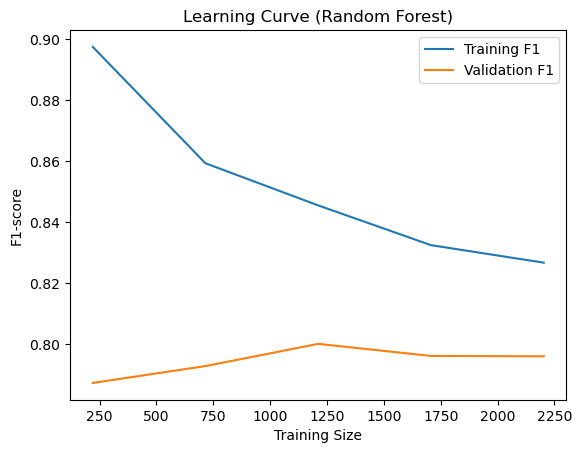

In [39]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training F1')
plt.plot(train_sizes, test_mean, label='Validation F1')
plt.xlabel('Training Size')
plt.ylabel('F1-score')
plt.title('Learning Curve (Random Forest)')
plt.legend()
plt.show()

Bu öğrenme eğrisinde, eğitim verisi arttıkça **eğitim F1 skorunun kademeli olarak azaldığı**, doğrulama F1 skorunun ise **hafif şekilde yükselip daha sonra sabitlendiği görülüyor**. Bu durum, modelin başlangıçta veriye biraz fazla uyum sağladığını ancak veri miktarı arttıkça **daha dengeli bir öğrenme sürecine geçtiğini** gösterir.
Sonuç olarak model kısmen overfitting eğilimi gösterse de, eğrilerin birbirine yaklaşmaya başlaması, modelin **genelleme yeteneğinin makul düzeyde** olduğunu ve daha fazla veriyle performansın iyileştirilebileceğini göstermektedir.

- #### En iyi modelin (Random Forest) F1 Cross Validation Skoru 

In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_rf, X_train, y_train, cv=10, scoring='f1')
print("Cross-validated F1:", scores.mean())

Cross-validated F1: 0.7993598425811006


- ### Yüksek Performanslı Modelin kaydetmesi

In [43]:
# Save the model to a file
joblib.dump(best_rf, "./models/student_depression_model.joblib")
print("Model saved successfully!")

Model saved successfully!


- ### Kaydeden Modelin Yüklenmesi

In [44]:
# Load the model
loaded_model = joblib.load("./models/student_depression_model.joblib")
print("Model loaded successfully!")

Model loaded successfully!


- ### Tahmin için hazırlanan veri örnekleri

In [45]:
# Example data
example_data = pd.DataFrame({
    "Extracurricular_Hours_Per_Day": [3.52, 5.63, 16.21, 1.51, 3.90, 19.94],
    "Social_Hours_Per_Day": [0.0, 1.1, 0.8, 0.6, 5.5, 0.2],
    "Physical_Activity_Hours_Per_Day": [5.4, 4.7, 5.6, 2.1, 6.8, 3.5],
    "GPA": [6.9, 3.2, 3.8, 3.4, 3.5, 9.3],
    "Stress_Level": [2, 1, 2, 2, 1, 2],
    "study_hours": [6, 7, 8, 10, 8, 5],
    "sleep_hours": [6, 6, 6, 8, 8, 6],
    "Academic Pressure": [4.0, 4.0, 1.0, 4.0, 3.0, 5.0],
    "Financial Stress": [3.0, 5.0, 1.0, 4.0, 2.0, 3.0]
})


- ### Tahmin etme

In [46]:
# Predict Depression (0 = not depressed, 1 = depressed)
predictions = loaded_model.predict(example_data)
print("Predictions:", predictions)

Predictions: [1 1 0 1 0 1]


- ### Seçilen modelin Avantajları ve dezavantajları (Random Forest)

### Random Forest (Tuned) — Avantajlar:

- Yüksek F1-score ve ROC AUC ile dengeli performans sergiliyor.

- Özellikle pozitif sınıfı yakalamada (recall ~0.88) başarılı, yani depresyonlu öğrencileri tespit etme konusunda güçlü.

- Gürültüye ve aşırtıya karşı dayanıklı (bagging sayesinde).

### Random Forest (Tuned) — Dezavantajlar:

- Eğitim skorunun çok yüksek ve doğrulama skoru daha düşük olduğu durumlarda (öğrenme eğrisine göre) bir miktar overfitting gösterebilir.

- Gerçek zamanlı veya çok düşük gecikme gerektiren uygulamalarda daha yavaş olabilir.

- Ağaçların sayısı/artması bellek ve hesap maliyeti getirir.

Bu çalışmada, öğrencilerin yaşam alışkanlıkları ve akademik göstergelerine dayanarak depresyon riskini tahmin etmek üzere üç farklı sınıflandırma algoritması (Random Forest, SVM, KNN) uygulanmıştır. Hiperparametre optimizasyonu sonrasında Random Forest (Tuned) en yüksek F1 ve ROC AUC değerlerini göstermiştir (F1 = 0.8118, ROC AUC = 0.8188). Öğrenme eğrileri ve confusion matrix analizleri, modelin depresyonlu öğrencileri tespit etmede yüksek recall sağladığını fakat eğitim-doğrulama farkı nedeniyle hafif overfitting barındırdığını göstermektedir. Bu nedenle, uygulamada modelin genel kullanılabilirliğini artırmak için veri miktarının artırılması, ek regularizasyon veya daha fazla çapraz doğrulama önerilmektedir.